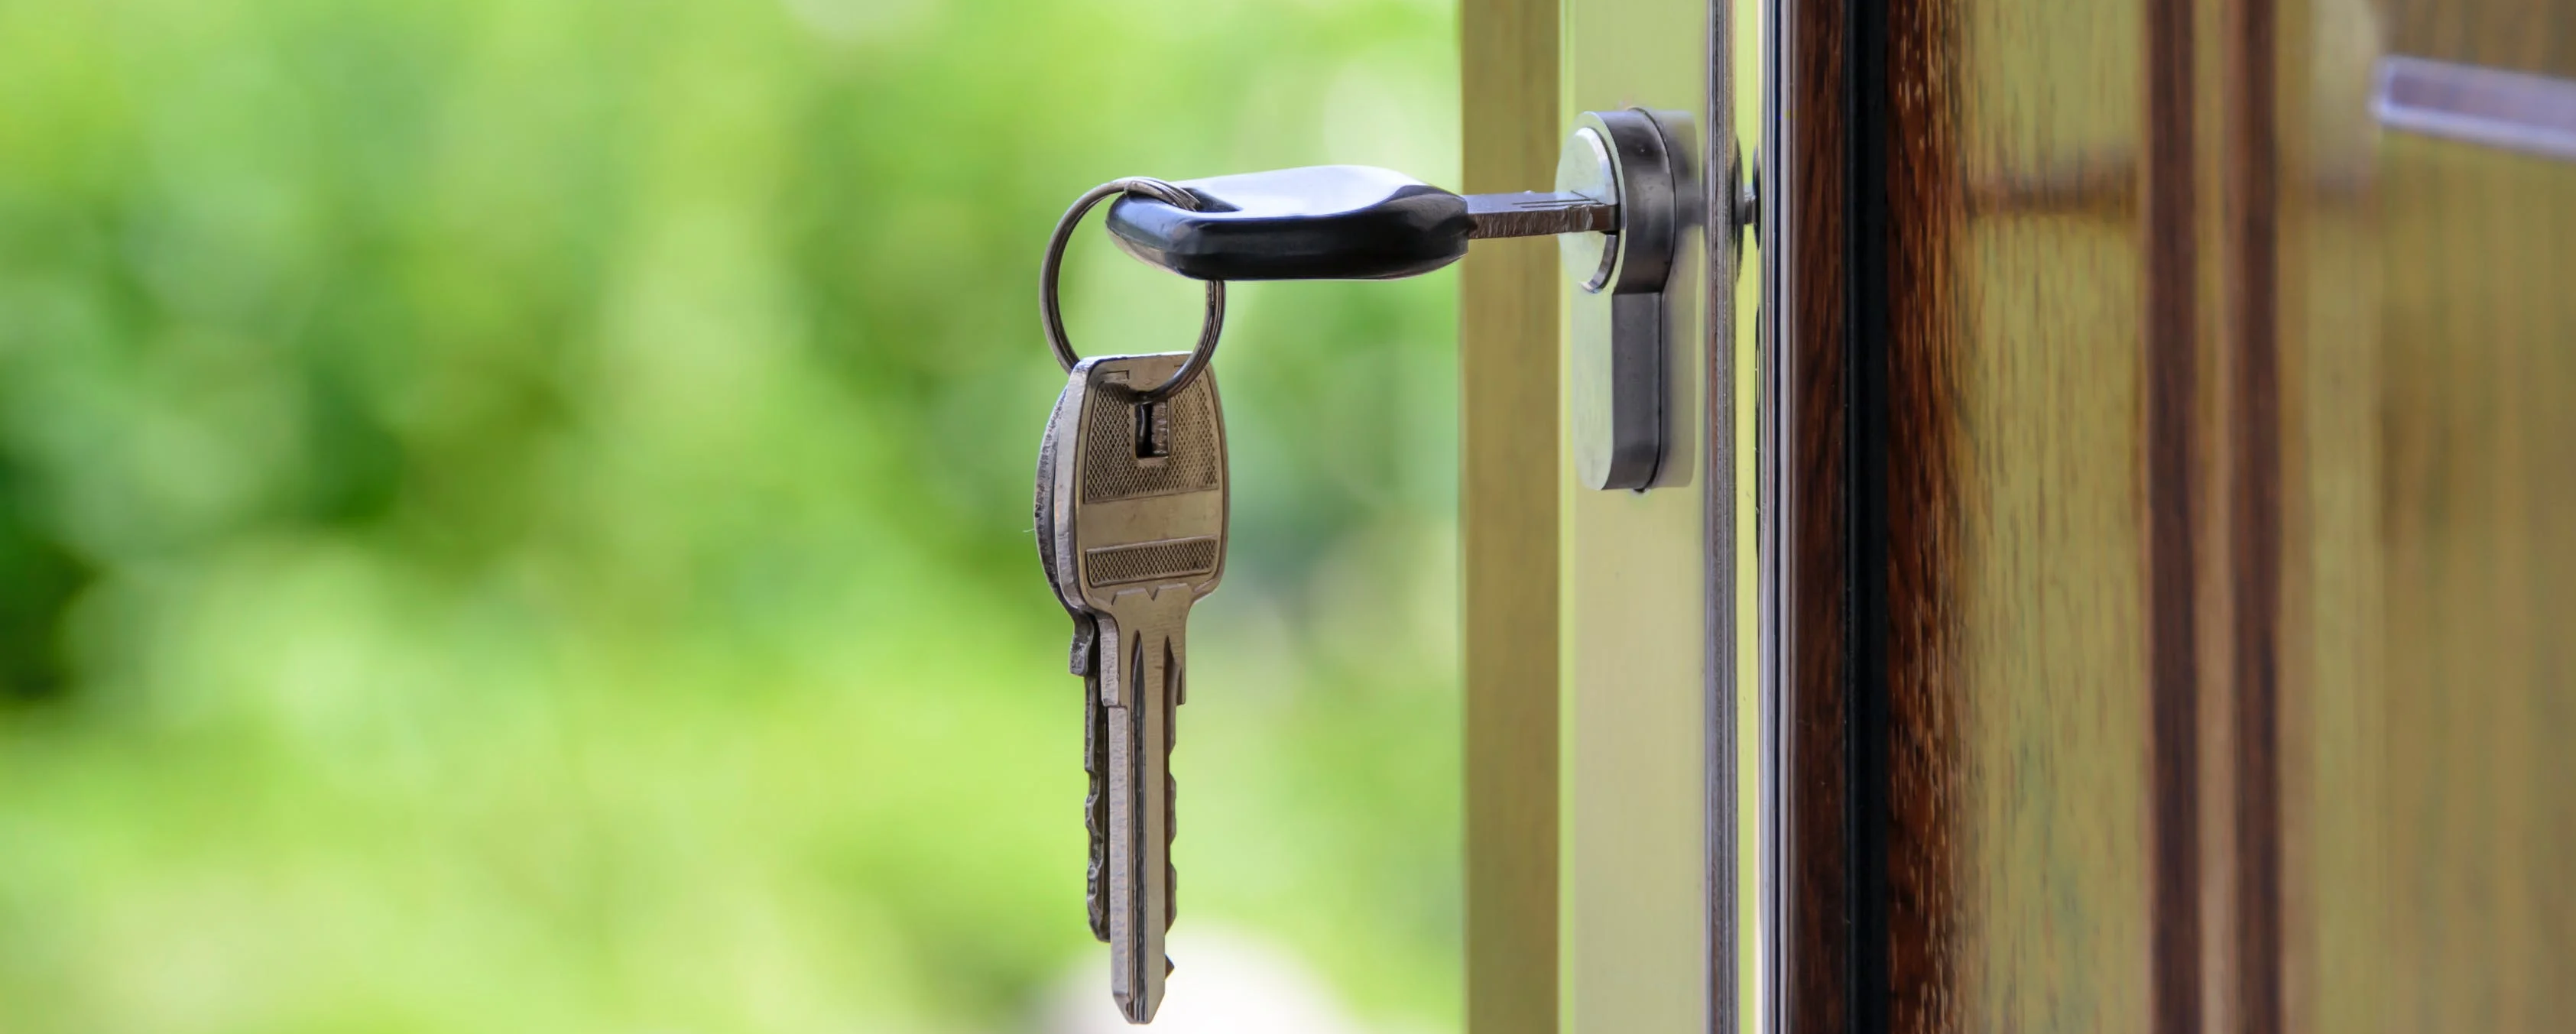

# 1. Introdução

 Lorem ipsum dolor sit amet, consectetur adipiscing elit. Suspendisse consectetur dui nec est varius, vitae maximus felis interdum. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Integer eu magna lacus. Fusce venenatis suscipit magna, et pharetra nisl maximus eget. Proin sit amet tortor venenatis, vulputate urna ac, ullamcorper ante. Sed tempor vehicula augue non sollicitudin. Fusce eget sagittis libero, a imperdiet dui. Donec lobortis auctor fringilla. Phasellus eget orci a lectus tristique interdum.

Maecenas ac maximus eros. Lorem ipsum dolor sit amet, consectetur adipiscing elit. Proin nec ipsum at neque tincidunt tincidunt. Nam a nunc ut enim rhoncus tempor eu vel nisl. Nullam mattis venenatis sem non auctor. Nullam lectus dui, vestibulum eu tellus varius, maximus pharetra elit. Vivamus blandit fringilla magna, ut aliquam augue facilisis vitae. Donec sit amet porttitor nunc. Phasellus porta turpis in urna gravida, fringilla congue mauris dapibus. Vivamus a nibh sit amet nisl porta bibendum vitae non sapien. Morbi sit amet ante dui. Phasellus ac urna cursus, dignissim nunc vel, suscipit odio. Nunc vel purus quis ligula accumsan ullamcorper in quis velit. Vivamus rhoncus euismod porta.

Nunc in arcu vel libero interdum dapibus. Aenean consectetur dui non turpis rhoncus, non volutpat ex mollis. Sed pretium metus quis arcu viverra feugiat. Donec et imperdiet erat, at ultrices tortor. Phasellus id neque at lacus cursus interdum. Ut fermentum luctus suscipit. Aenean dictum sollicitudin justo, ac suscipit risus bibendum lobortis. 

## 1.1. Descrição das Variáveis

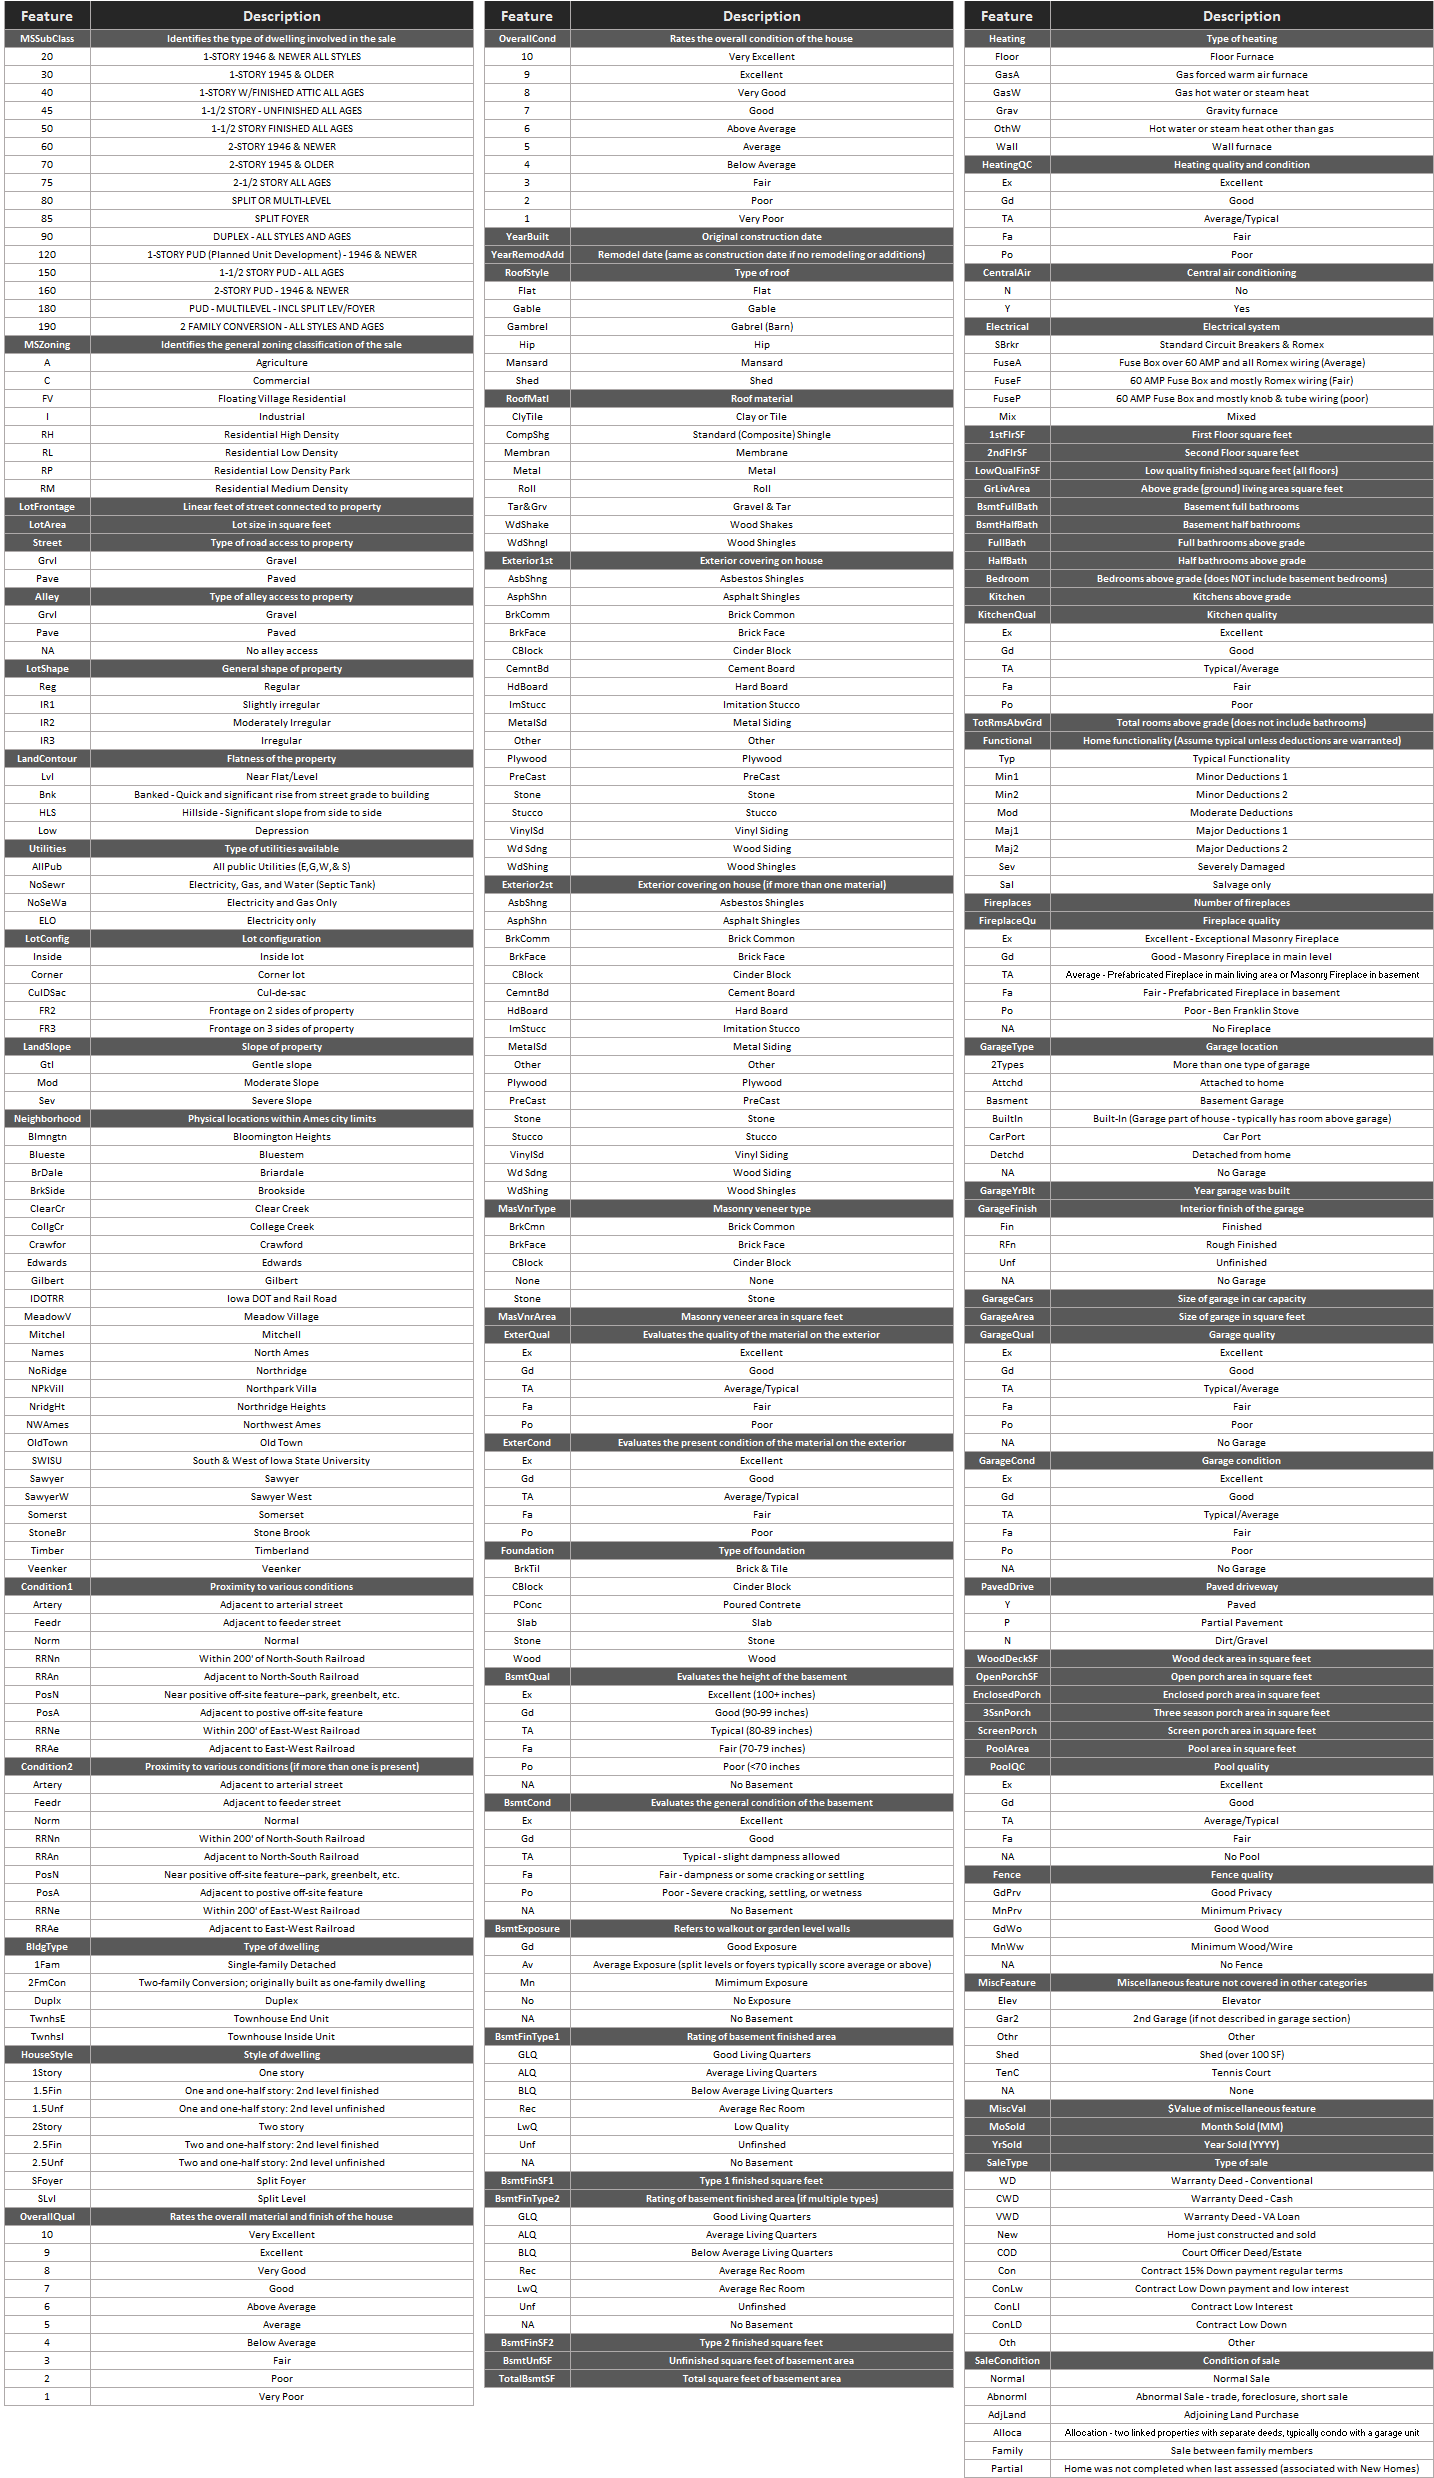

# 2. Importação das Bibliotecas

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
plt.style.use('seaborn-darkgrid')
matplotlib_axes_logger.setLevel('ERROR')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

from tqdm import tqdm

# 3. Carregamento dos Datasets

In [2]:
df_treino = pd.read_csv('train.csv')
df_teste = pd.read_csv('test.csv')
df_combinado = pd.concat([df_treino, df_teste])

# 4. Análise Exploratória dos Dados

## 4.1. Análise Básica das Informações

In [3]:
# Exibição das primeiras linhas do DF
df_combinado.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn         2.0       548.0         TA   
1     Attchd       1976.0          RFn         2.0       460.0         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   

   ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0    NaN   NaN         NaN        0       2    2008   
1            0         0    NaN   NaN         NaN        0       5    2007   

  SaleType SaleCondition  SalePrice  
0       WD        Normal   208500.0  
1       WD        Normal   181500.0

In [4]:
# DF Treino: 1460 linhas por 81 colunas (Variável Target: SalePrice)
# DF Teste: 1459 linhas por 80 colunas
# DF Combinado: 2919 linhas por 81 colunas
df_treino.shape, df_teste.shape, df_combinado.shape

((1460, 81), (1459, 80), (2919, 81))

In [6]:
# Informações Básicas das Colunas do DF
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## 4.2. Análise Descritiva das *Features*

In [7]:
# Exibição descritiva das variáveis numéricas do DF (38 no total)
display(df_combinado.describe().shape[1], df_combinado.describe())

38

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [8]:
# Exibição descritiva das variáveis categóricas do DF (43 no total)
display(df_combinado.describe(include='O').shape[1], df_combinado.describe(include='O'))

43

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      2915   2919   198     2919        2919      2917      2919   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       2265   2907   120     1859        2622      2916      2133   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       2919         2919       2919       2919     2919       2919   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        2778          443       2511       2889     2425       1471   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       2919     2919        2918        2918       2895      2919   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        2310     2876        1025        1014       1742      1798   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       2919       2919     2838     2837         2837         2840   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        2538       1308     1283     2606         1904          851   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          2839    2919      2919       2919       2918        2918   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           2493    2874      1493       2723       2671        1492   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        2917        1499       2762         2760       2760       2760   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         2717         744       1723         1230       2604       2654   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        2919     10    571         105     2918          2919  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         2641      4    329          95     2525          2402

## 4.3. Verificando a Correlação entre as *Features*

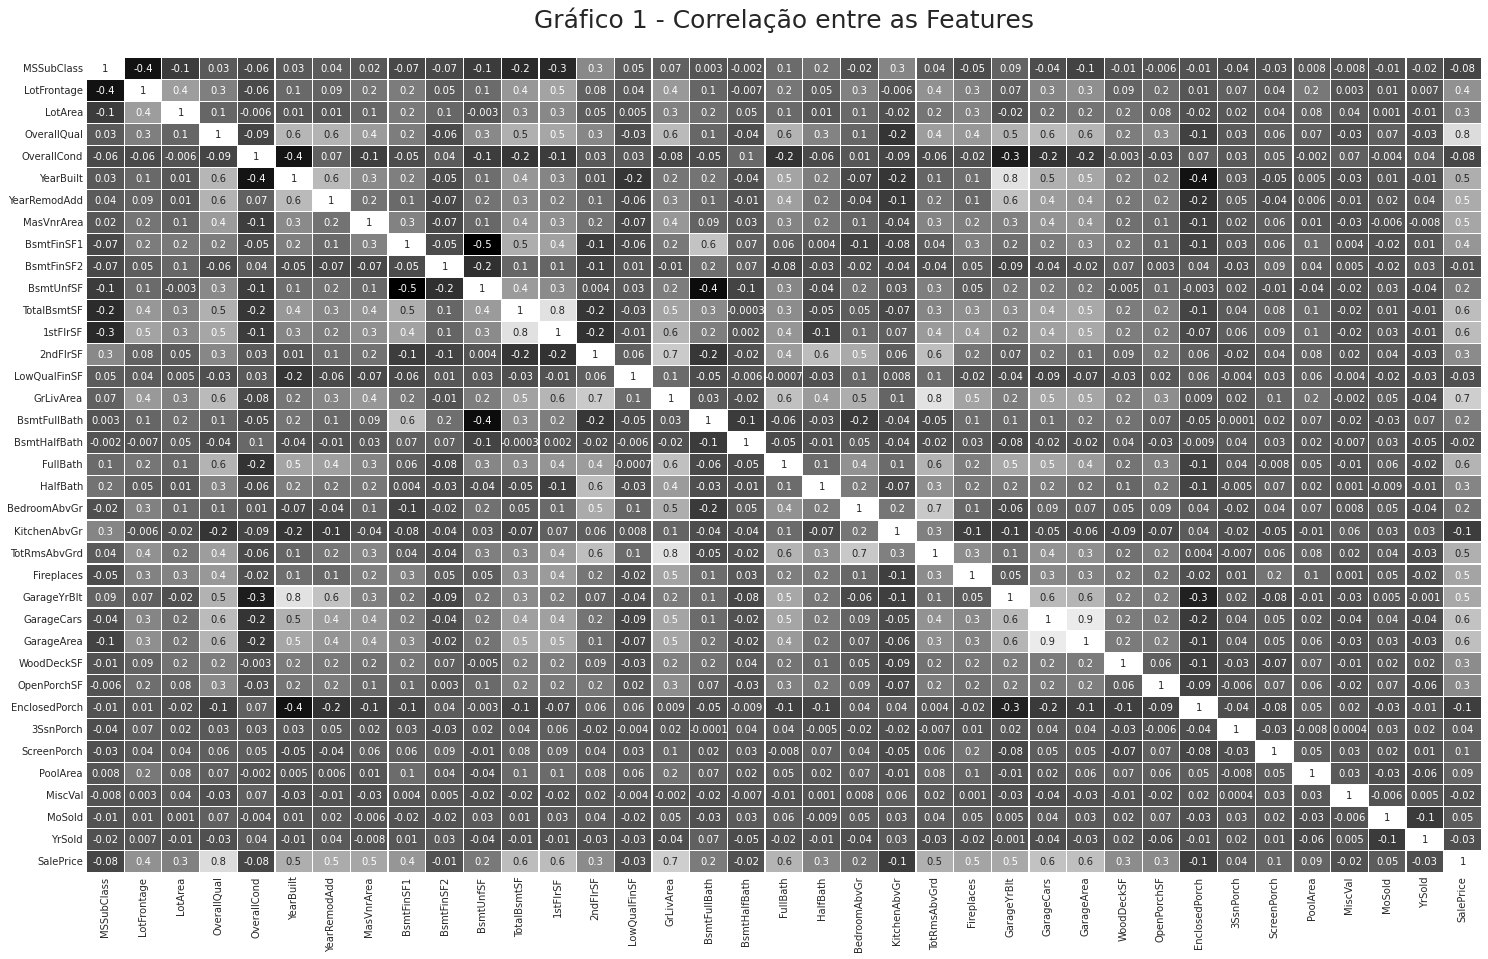

In [9]:
# Plotagem do gráfico de correlação entre as variáveis
df_corr = df_treino.drop('Id', axis=1)
plt.figure(figsize=(25, 15))
plt.title('Gráfico 1 - Correlação entre as Features', pad=30, fontsize=25)
sns.set(font_scale=1.2)
sns.heatmap(df_corr.corr(), 
            fmt='.1g' ,
            annot=True, 
            square=False, 
            cbar=False, 
            linewidths=0.25, 
            cmap='gray', 
            annot_kws={'size': 10})
plt.show()

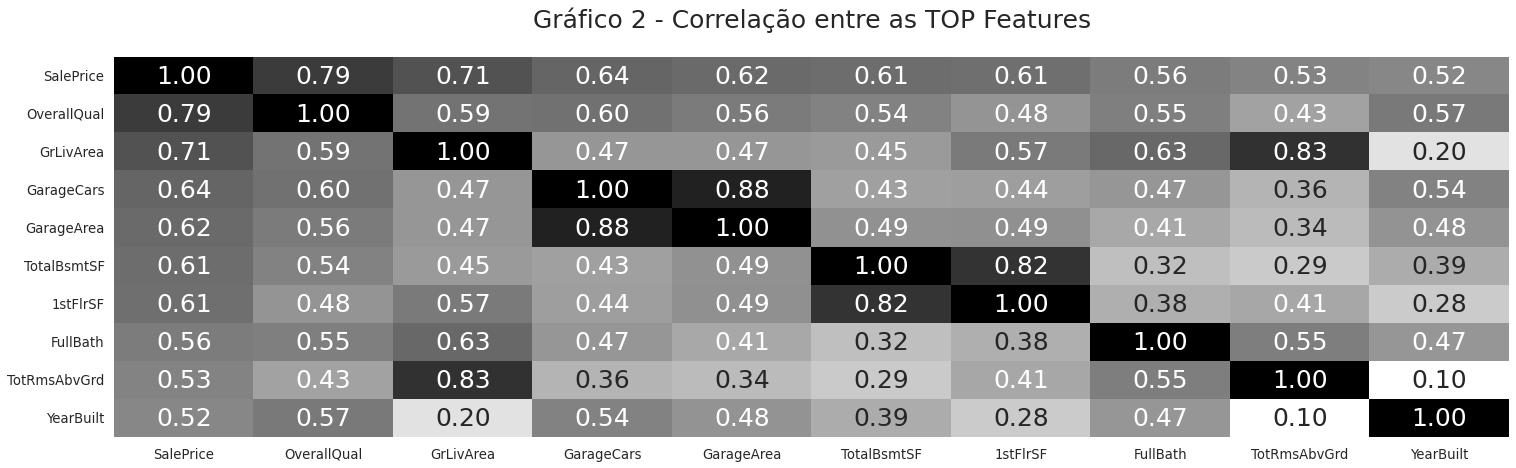

In [11]:
# Plotagem do gráfico das 10 features com maior correlação com a variável target ('SalePrice')
k = 10
plt.figure(figsize=(25, 7))
plt.title('Gráfico 2 - Correlação entre as TOP Features', pad=30, fontsize=25)
cols = df_treino.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_treino[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=False,
                 annot=True,
                 square=False,
                 fmt='.2f',
                 annot_kws={'size': 25},
                 cmap='gray_r',
                 yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

***
**Gráfico 2 - Observações**

* As *features* 'OverallQual', 'GrLivArea' e 'GarageCars' estão fortemente correlacionadas com a *feature* 'SalePrice';
* As *features* 'GarageCars' e 'GarageArea' possuem correlação semelhantes, uma vez que o tamanho da garagem geralmente corresponde à quantidade total de vagas de carros disponíveis, observa-se a correlação entre elas (0.88); Veremos essa correlação mais a fundo adiante;
* De igual modo as *features* ['TotalBsmtSF' e '1stFlrSF'] e ['GrLivArea' e 'TotRmsAbvGrd'] possuem uma alta correlação entre si.
***

## 4.4. Analisando as Demais *Features*

In [ ]:
df_temp = df_combinado.dropna()
grafico = px.treemap(data_frame=df_temp, path=['MSZoning'])
grafico.show()

In [ ]:
grafico = px.treemap(data_frame=df_temp, path=['Condition1'], values='SalePrice', title='Distribuição ')
grafico.show()

In [ ]:
grafico = px.treemap(data_frame=df_temp, path=['BldgType'])
grafico.show()

In [ ]:
grafico = px.treemap(data_frame=df_temp, path=['SaleType'])
grafico.show()

## 4.5. Analisando a Variável *Target* ('SalePrice')

In [12]:
df_treino.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

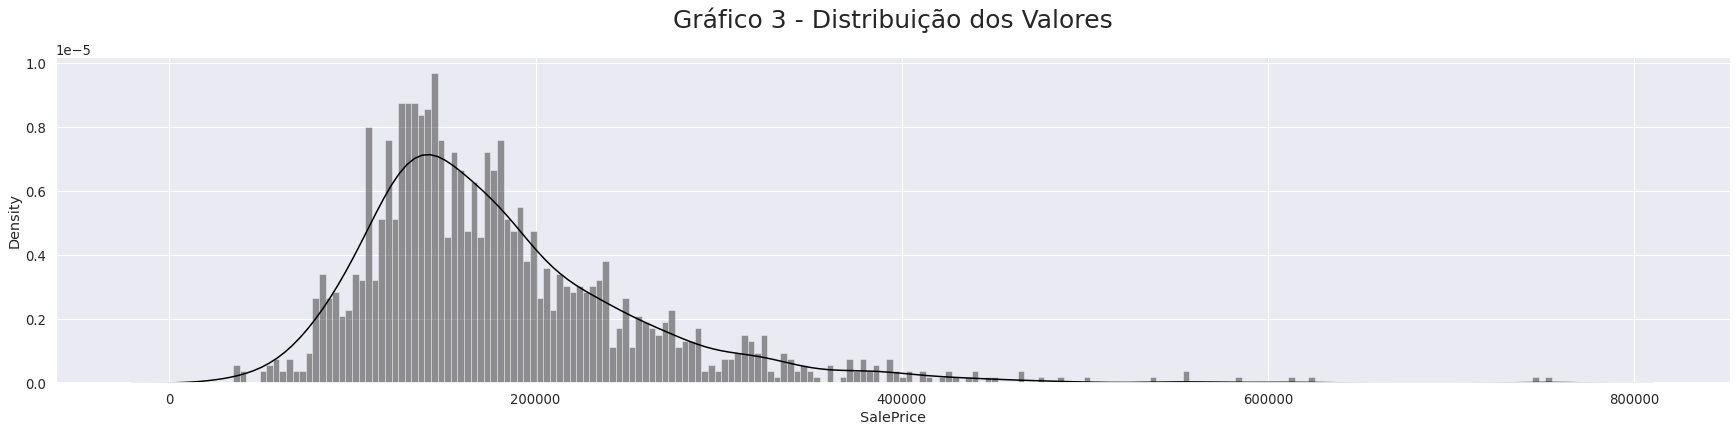

In [13]:
fig, ax = plt.subplots(figsize=(30, 6))
sns.distplot(df_treino.SalePrice, color="black", bins=200)
plt.title('Gráfico 3 - Distribuição dos Valores', pad=30, fontsize=25)

for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
ax.spines['bottom'].set_linewidth(1.75)

plt.show()

In [14]:
print(f'Assimetria Positiva: {round(df_treino.SalePrice.skew(), 3)}.')
print(f'Curtóise Platicúrtica: {round(df_treino.SalePrice.kurt(), 3)}.')

Assimetria Positiva: 1.883.
Curtóise Platicúrtica: 6.536.


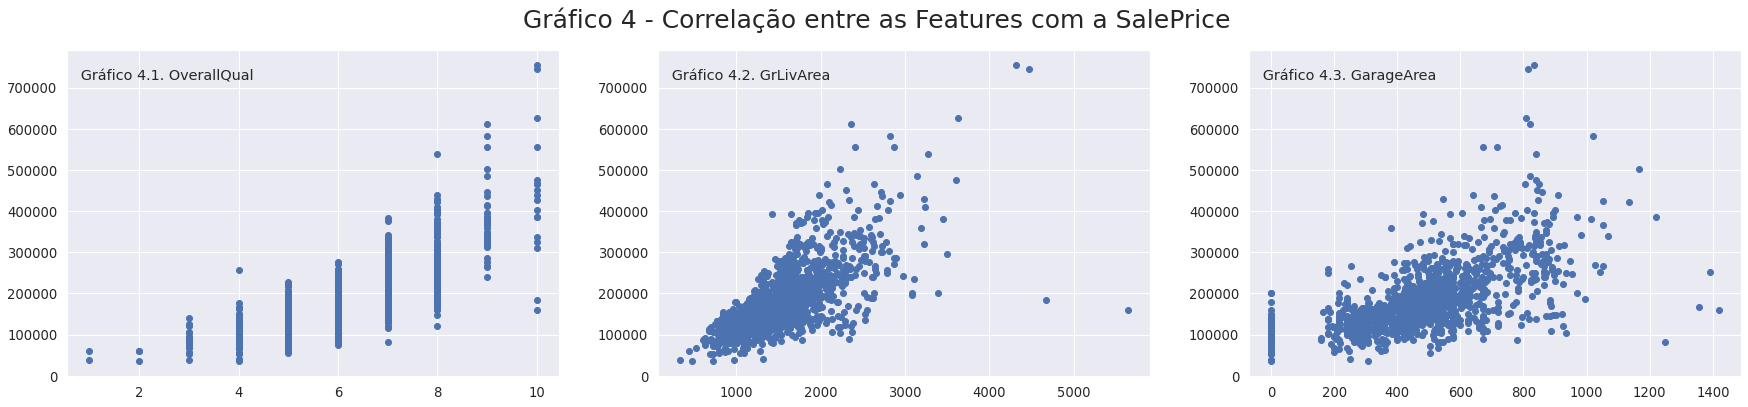

In [15]:
features = ['OverallQual', 'GrLivArea', 'GarageArea']

figura = plt.figure(figsize=(30, 6))
figura.suptitle('Gráfico 4 - Correlação entre as Features com a SalePrice', fontsize=25)

for i in range(3):
    figura.add_subplot(1,3,i+1)
    plt.scatter(x=df_treino[features[i]], y=df_treino['SalePrice'])
    plt.title(f'   Gráfico 4.{i+1}. {features[i]}', pad=-30, loc='left')

***
**Gráfico 4. Observações**

Podemos observar alguns **outliers**, principalmente no Gráfico 4.2.

***

# 5. *Feature Engineering*

## 5.1. Tratamento de Valores Ausentes

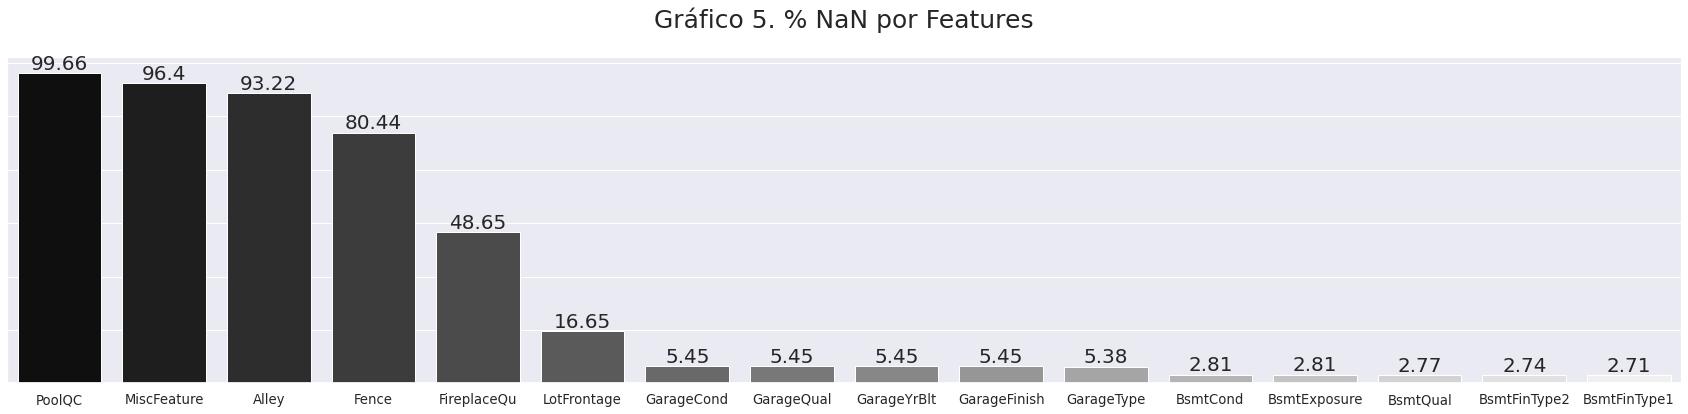

In [16]:
# Criação do DF com os Valores Nulos
df_nulos = df_combinado.drop('SalePrice', axis=1)
df_nulos = df_nulos.isnull().sum().sort_values(ascending=False)[0:34].to_frame().reset_index()
df_nulos.columns = ['Feature', 'Count']

# Plotagem do gráfico
fig, ax = plt.subplots(figsize=(30, 6))
sns.barplot(x='Feature', y='Count', data=df_nulos[0:16], palette='gray')
plt.title('Gráfico 5. % NaN por Features', fontsize=25, pad=30)

ax.set_ylabel('')
ax.set_xlabel('')
ax.tick_params(axis='y', labelleft=False, left=None)

for axis in ['top', 'right', 'left']:
    ax.spines[axis].set_color(None)
ax.spines['bottom'].set_linewidth(1.75)

for i in ax.patches:
    ax.annotate(round(i.get_height()/len(df_combinado)*100,2),       
                (i.get_x() + i.get_width() / 2, i.get_height() + 25),
                ha='center',
                va='baseline',
                xytext=(0, 1), textcoords='offset points',
                fontsize=20)

***
**Gráfico 5. Observações 1**

* **PoolQC:** Pool quality;
* **MiscFeature:** Miscellaneous feature not covered in other categories;
* **Alley:** Type of alley access do property;
* **Fence:** Fence quality; e
* **FireplaceQu:** Fireplace quality.

Possuem uma quantidade de valores ausentes demasiadamente alta, portanto iremos excluir essas colunas do *DataFrame*.

***


In [17]:
# Exclusão das colunas mencionadas acima, e da coluna ID
features_excluir = df_nulos.Feature[0:5].values
df_combinado.drop(features_excluir, axis=1, inplace=True)
df_combinado.drop('Id', axis=1, inplace=True)
shape = df_combinado.shape
print(f'Agora o DataFrame possui {shape[0]} linhas por {shape[1]} colunas.')

Agora o DataFrame possui 2919 linhas por 75 colunas.


***
**Gráfico 5. Observações 2**

As variaveis **GarageFinish**, **GarageQual**, **GarageCond** e **GarageYrBlt** possuem a mesma porcentagem de valores ausentes.

***

## 5.2. Verificação das *Features* 'Garage'

In [18]:
# Selecionando todas as colunas que possuam a palavra 'Garage'
features_garagem = list()
for coluna in df_combinado.columns:
    if 'garage' in coluna.lower():
        features_garagem.append(coluna)

# Criação de um DataFrame apenas com as colunas selecionadas acima
df_garagem = df_combinado[features_garagem]
df_garagem['SalePrice'] = df_combinado.SalePrice
df_garagem.head(2)

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2003.0          RFn         2.0       548.0         TA   
1     Attchd       1976.0          RFn         2.0       460.0         TA   

  GarageCond  SalePrice  
0         TA   208500.0  
1         TA   181500.0

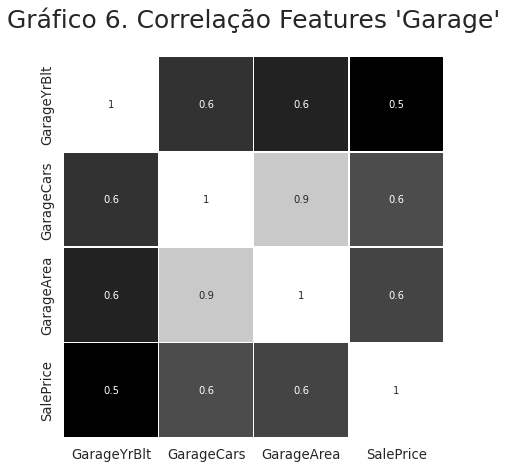

In [19]:
plt.figure(figsize=(7, 7))
sns.set(font_scale=1.2)
plt.title("Gráfico 6. Correlação Features 'Garage'", fontsize=25, pad=30)

sns.heatmap(df_garagem.corr(), 
            fmt='.1g',
            annot=True,
            square=True,
            cbar=False,
            linewidths=0.25,
            cmap='gray',
            annot_kws={'size': 10})
plt.show()

***
**Gráfico 6. Observações**

As *features* **GarageArea** e **GarageCars** possuem uma alta correlação, uma vez que é justificável que quanto maior a área da garagem, maior será a quantidade de vagas para carros. Iremos optar apenas por uma delas, no caso será a **GarageArea**.

***

In [20]:
# Eliminação da coluna 'GarageCars'
df_combinado.drop('GarageCars', axis=1, inplace=True)

## 5.3. Detecção e Tratamento de *Outliers*

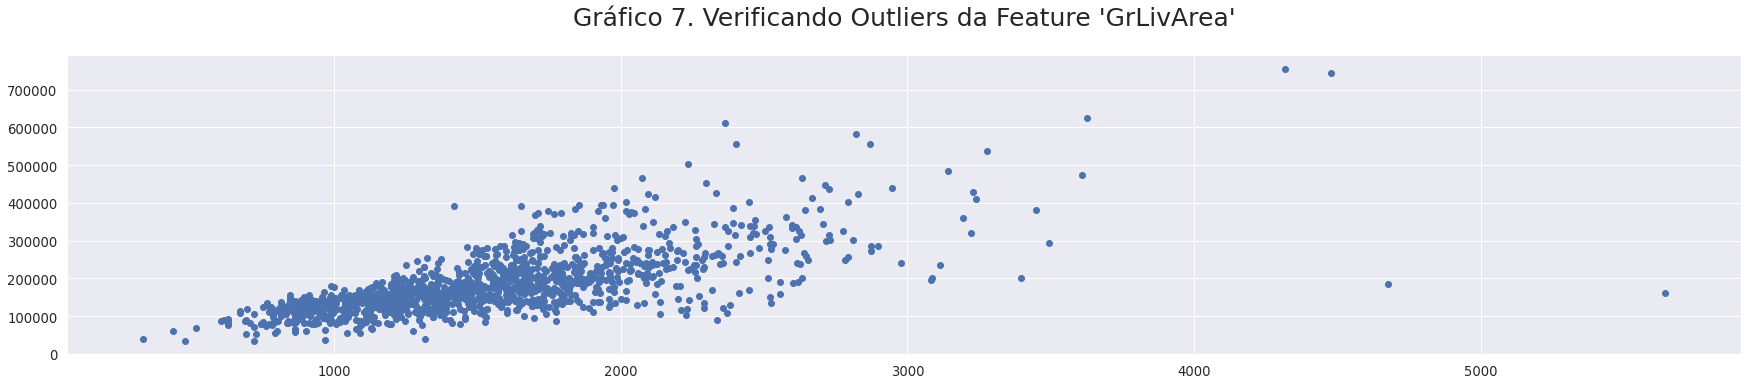

In [21]:
# Plotagem Gráfico Outliers 'GrLivArea'
plt.figure(figsize=(30, 5.5))
plt.scatter(df_treino.GrLivArea, df_treino.SalePrice)
plt.title("Gráfico 7. Verificando Outliers da Feature 'GrLivArea'", fontsize=25, pad=30)
plt.show()

In [22]:
# Exibição das linhas identificadas com Outliers
outliers_grlivarea = df_treino[(df_treino.GrLivArea > 4000) & (df_treino.SalePrice < 300000)]
outliers_grlivarea

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523        762.0        Ex        TA      PConc       Ex       TA   
1298       796.0        Ex        TA      PConc       Ex       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
523            Gd          GLQ        2260          Unf           0   
1298           Gd          GLQ        5644          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
523         878         3138    GasA        Ex          Y      SBrkr   
1298        466         6110    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
523       3138      1538             0       4676             1             0   
1298      4692       950             0       5642             2             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
523          3         1             3             1          Ex   
1298         2         1             3             1          Ex   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
523             11        Typ           1          Gd    BuiltIn       2007.0   
1298            12        Typ           3          Gd     Attchd       2008.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
523           Fin           3         884         TA         TA          Y   
1298          Fin           2        1418         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
523          208          406              0          0            0   
1298         214          292              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
523          0    NaN   NaN         NaN        0      10    2007      New   
1298       480     Gd   NaN         NaN        0       1    2008      New   

     SaleCondition  SalePrice  
523        Partial     184750  
1298       Partial     160000

In [23]:
# Exclusão das linhas com Outliers identificados
df_combinado.drop(outliers_grlivarea.index, inplace=True)

In [24]:
# Criação dos DFs Treino e de Validação
df_treino = df_combinado[df_combinado.SalePrice.notnull()]
df_valida = df_combinado[df_combinado.SalePrice.isnull()]

# 6. Divisão Treino e Teste



In [25]:
# Divisão do DF nas 'variáveis' preditoras e target
features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = df_treino[features]
y = df_treino.SalePrice

In [26]:
# Divisão das 'variáveis' entre treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
X_treino.shape, y_treino.shape, X_teste.shape, y_teste.shape

((1020, 6), (1020,), (438, 6), (438,))

# 7. Aplicação  de *Machine Learning*

## 7.1. Sem Escalonamento

### 7.1.1. Random Forest

In [28]:
regressorRF = RandomForestRegressor(n_estimators=500, random_state=0)
regressorRF.fit(X_treino, y_treino)

score = regressorRF.score(X_teste, y_teste) * 100
print(f'SCORE: {score}')

previsaoRF = regressorRF.predict(X_teste)
MAE = metrics.mean_absolute_error(y_teste, previsaoRF)
MSE = metrics.mean_squared_error(y_teste, previsaoRF)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

SCORE: 87.40765150464757
MAE: 19900.034698666375
MSE: 857219332.5715157
RMSE: 29278.308225912162


## 7.2. Com Escalonamento

### 7.2.1. Escalonamento das *Features*

In [29]:
# Criação das variáveius escalonadas
scalerX = StandardScaler()
X_treino_scaled = scalerX.fit_transform(X_treino)
X_teste_scaled = scalerX.fit_transform(X_teste)

scalerY = StandardScaler()
y_treino_scaled = scalerY.fit_transform(y_treino.to_frame())
y_teste_scaled = scalerY.fit_transform(y_teste.to_frame())

### 7.2.2. Random Forest

In [30]:
regressorRF2 = RandomForestRegressor(n_estimators=500, random_state=0)
regressorRF2.fit(X_treino_scaled, y_treino_scaled)

score = regressorRF2.score(X_teste_scaled, y_teste_scaled) * 100
print(f'SCORE: {score}')

previsaoRF2 = regressorRF2.predict(X_teste_scaled)
y_inverse = scalerY.inverse_transform(y_teste_scaled)
prev_inverse = scalerY.inverse_transform(previsaoRF2.reshape(-1,1))

MAE = metrics.mean_absolute_error(y_inverse, prev_inverse)
MSE = metrics.mean_squared_error(y_inverse, prev_inverse)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

SCORE: 87.34576240330692
MAE: 20012.49150895734
MSE: 861432409.5971614
RMSE: 29350.16881718334


### 7.2.3. SVM

In [31]:
kernels = ['linear', 'poly', 'rbf']

for k in kernels:
    regressorSVM2 = SVR(kernel=k)
    regressorSVM2.fit(X_treino_scaled, y_treino_scaled)    
    
    score = regressorSVM2.score(X_teste_scaled, y_teste_scaled) * 100
    print('-'*5 + f' Kernel {k.upper()} ' + '-'*5)
    print(f'SCORE: {score}')
    
    previsaoSVM2 = regressorSVM2.predict(X_teste_scaled)
    y_inverse = scalerY.inverse_transform(y_teste_scaled)
    prev_inverse = scalerY.inverse_transform(previsaoSVM2.reshape(-1,1))
    
    MAE = metrics.mean_absolute_error(y_inverse, prev_inverse)
    MSE = metrics.mean_squared_error(y_inverse, prev_inverse)
    RMSE = np.sqrt(MSE)

    print(f'MAE: {MAE}')
    print(f'MSE: {MSE}')
    print(f'RMSE: {RMSE}')

----- Kernel LINEAR -----
SCORE: 81.20926472027988
MAE: 22607.032827744482
MSE: 1279172154.499597
RMSE: 35765.51627615065
----- Kernel POLY -----
SCORE: 58.296301540206116
MAE: 32214.539244435997
MSE: 2838963404.853556
RMSE: 53281.92380961442
----- Kernel RBF -----
SCORE: 86.29425023551698
MAE: 19659.323859803877
MSE: 933013700.3306879
RMSE: 30545.2729621244


### 7.2.3. Redes Neurais

In [32]:
regressorRNA = MLPRegressor(max_iter=1000, hidden_layer_sizes=(6, 6))
regressorRNA.fit(X_treino_scaled, y_treino_scaled)

score = regressorRNA.score(X_teste_scaled, y_teste_scaled) * 100
print(f'Score: {score}')

previsaoRNA = regressorRNA.predict(X_teste_scaled)
y_inverse = scalerY.inverse_transform(y_teste_scaled)
prev_inverse = scalerY.inverse_transform(previsaoRNA.reshape(-1, 1))

MAE = metrics.mean_absolute_error(y_inverse, prev_inverse)
MSE = metrics.mean_squared_error(y_inverse, prev_inverse)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

Score: 88.40123163386075
MAE: 19830.33658957497
MSE: 789581743.3216006
RMSE: 28099.497207629902


### 7.2.4. XGBoost

In [33]:
regressorXG = GradientBoostingRegressor(learning_rate=0.06, n_estimators=100, max_depth=3)
regressorXG.fit(X_treino_scaled, y_treino_scaled)

score = regressorXG.score(X_teste_scaled, y_teste_scaled) * 100
print(f'Score: {score}')

previsaoXG = regressorXG.predict(X_teste_scaled)
y_inverse = scalerY.inverse_transform(y_teste_scaled)
prev_inverse = scalerY.inverse_transform(previsaoXG.reshape(-1, 1))

MAE = metrics.mean_absolute_error(y_inverse, prev_inverse)
MSE = metrics.mean_squared_error(y_inverse, prev_inverse)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

Score: 88.01406241681308
MAE: 19906.798445498946
MSE: 815938140.4585075
RMSE: 28564.630935100624


## 7.3. Cross Validation

In [34]:
# Preparação
scalerX = StandardScaler()
X_scaled = scalerX.fit_transform(X)
scalerY = StandardScaler()
y_scaled = scalerY.fit_transform(y.to_frame())

regressores = []
regressores.append(('Random Forest', RandomForestRegressor(n_estimators=500, random_state=0)))
regressores.append(('SVM', SVR(kernel='rbf')))
regressores.append(('Redes Neurais', MLPRegressor(max_iter=1000, hidden_layer_sizes=(6, 6))))
resultados = []

for modelo, reg in regressores:
    print(f'Rodando {modelo} ...')
    for i in tqdm(range(30)):
        kfold = KFold(n_splits=10, shuffle=True, random_state=i)                    
        scores = cross_val_score(reg, X_scaled, y_scaled, cv=kfold)
        temp = [modelo, scores.mean()]
        resultados.append(temp)

Rodando Random Forest ...


  3%|▎         | 1/30 [00:31<15:07, 31.28s/it]


KeyboardInterrupt: 

In [ ]:
# Transformação da lista de resultados em um DataFrame
colunas = ['RandomForest', 'SVM', 'RedesNeurais']
df_resultados = pd.DataFrame()

for coluna in colunas:
    df_resultados[coluna] = 0

for i in range(30):
    df_resultados.loc[i] = [resultados[i][1], resultados[i + 30][1], resultados[i + 60][1]]

display(df_resultados.head(2), df_resultados.describe())

In [ ]:
# Exportação do DF criado
df_resultados.to_csv('resultadosWithKFold.csv')

In [36]:
df_resultados = pd.read_csv('resultadosWithKFold.csv')
df_resultados

Unnamed: 0  RandomForest       SVM  RedesNeurais
0            0      0.862038  0.828266      0.858150
1            1      0.858222  0.832259      0.855515
2            2      0.852459  0.823443      0.849912
3            3      0.862413  0.832775      0.856505
4            4      0.861747  0.831052      0.856987
5            5      0.858064  0.831054      0.858293
6            6      0.858288  0.827507      0.857428
7            7      0.850337  0.827077      0.852739
8            8      0.856483  0.829999      0.845347
9            9      0.856662  0.828843      0.855861
10          10      0.856431  0.828213      0.851807
11          11      0.854934  0.823298      0.861947
12          12      0.860076  0.830907      0.849451
13          13      0.851904  0.831521      0.845336
14          14      0.860841  0.830368      0.851105
15          15      0.858881  0.828433      0.843544
16          16      0.856990  0.827925      0.856633
17          17      0.851027  0.831296      0.861620
18          18      0.854641  0.822006      0.846373
19          19      0.860973  0.828905      0.853876
20          20      0.850884  0.826301      0.849949
21          21      0.857298  0.834972      0.858149
22          22      0.847249  0.826087      0.852273
23          23      0.865063  0.829516      0.857093
24          24      0.862028  0.831466      0.859374
25          25      0.863144  0.830293      0.851282
26          26      0.856697  0.831085      0.847362
27          27      0.854191  0.827535      0.851202
28          28      0.858083  0.830916      0.858337
29          29      0.851910  0.826342      0.852523

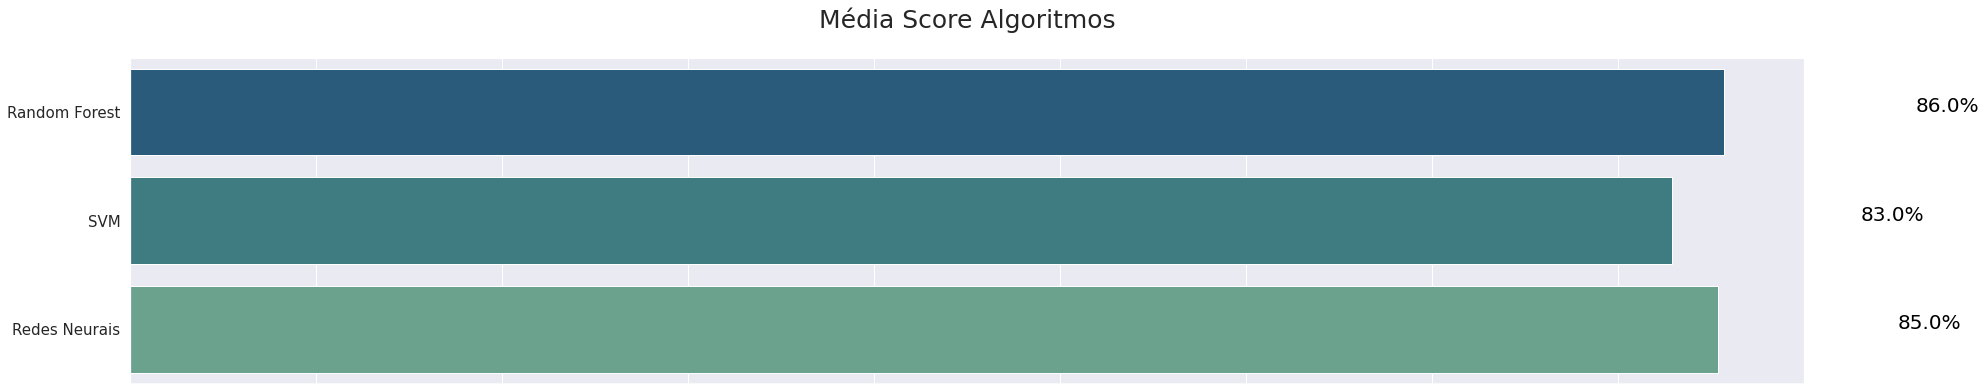

In [37]:
mediaRandomForest = df_resultados.RandomForest.mean()
mediaSVM = df_resultados.SVM.mean()
mediaRedesNeurais = df_resultados.RedesNeurais.mean()

x = ['Random Forest', 'SVM', 'Redes Neurais']
y = [mediaRandomForest, mediaSVM, mediaRedesNeurais]

fig, ax = plt.subplots(figsize=(30, 6))
sns.barplot(y, x, palette='crest_r')
ax.tick_params(axis='x', labelbottom=False), ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel(''), ax.set_ylabel(''), ax.set_title('Média Score Algoritmos', fontsize=25, pad=30)
ax.spines['bottom'].set_linewidth(2.5)

for axis in ['top', 'right', 'bottom']:    ax.spines[axis].set_color(None)

labels = []
valores = []
total = 0

for numero in y:        
    valores.append(np.round(numero, 2))
    total += numero  
index = np.arange(len(labels))

for i, v in enumerate(valores):
    plt.text(v + 0.1, i , s=(str(v*100) + '%'), color='black', fontsize=20)